#Importing Libraries


In [ ]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset

In [47]:
df = pd.read_csv('hotel_bookings 2.csv')

#Exploratory Data Analysis and Data Cleaning

In [45]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,3


In [ ]:
df.tail()

In [ ]:
df.shape

(81571, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81571 entries, 0 to 81570
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81571 non-null  object 
 1   is_canceled                     81571 non-null  int64  
 2   lead_time                       81571 non-null  int64  
 3   arrival_date_year               81571 non-null  int64  
 4   arrival_date_month              81571 non-null  object 
 5   arrival_date_week_number        81571 non-null  int64  
 6   arrival_date_day_of_month       81570 non-null  float64
 7   stays_in_weekend_nights         81570 non-null  float64
 8   stays_in_week_nights            81570 non-null  float64
 9   adults                          81570 non-null  float64
 10  children                        81566 non-null  float64
 11  babies                          81570 non-null  float64
 12  meal                            

In [48]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='mixed')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
# Object datatype is used for catagorical data
# Here we are trying to check how many unique categories are there for each object
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
# Checking what are the unique values in the given columns
for col in df.describe(include='object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [49]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [50]:
df.drop(['agent','company'],axis=1, inplace=True)
df.dropna(inplace= True)

In [51]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-31 20:49:36.695991552
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

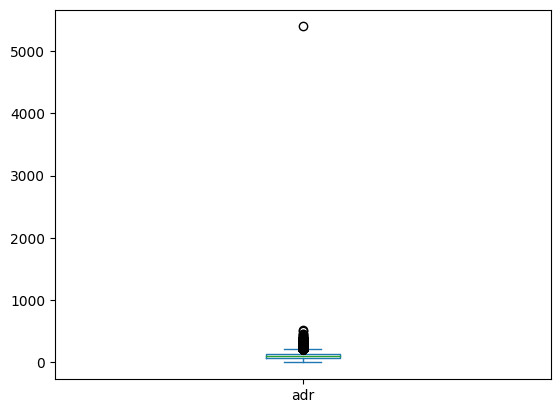

In [ ]:
df['adr'].plot(kind='box')

In [52]:
df=df[df['adr']<5000]

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-31 20:51:35.775334912
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


<Axes: >

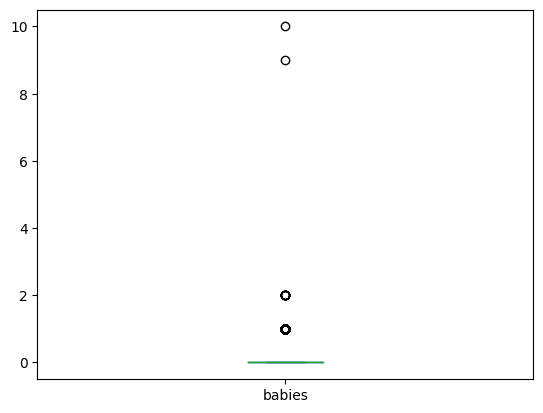

In [ ]:
df['babies'].plot(kind='box')

<Axes: >

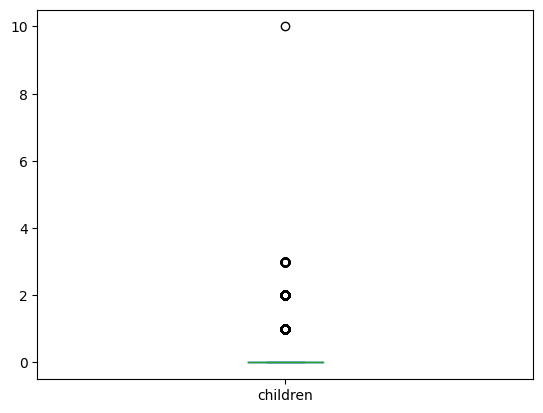

In [ ]:
df['children'].plot(kind='box')

In [53]:
df=df[df['children']<10]
df=df[df['babies']<8]

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894
mean,0.371348,104.313784,2016.157678,27.166737,15.800907,0.928878,2.502111,1.858395,0.104126,0.007788,0.032012,0.087145,0.131638,0.221147,2.330833,101.958626,0.061887,0.571686,2016-07-31 21:00:25.979444224
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.483167,106.904302,0.707455,13.589887,8.780407,0.996181,1.900065,0.578580,0.398146,0.089238,0.176032,0.845883,1.484697,0.652764,17.630744,48.091689,0.244176,0.792686,NaN


#Data Analysis and Visualization

In [54]:
#Checking the cancel percentage
cancel_perc=df['is_canceled'].value_counts(normalize=True)
cancel_perc

is_canceled
0    0.628652
1    0.371348
Name: proportion, dtype: float64

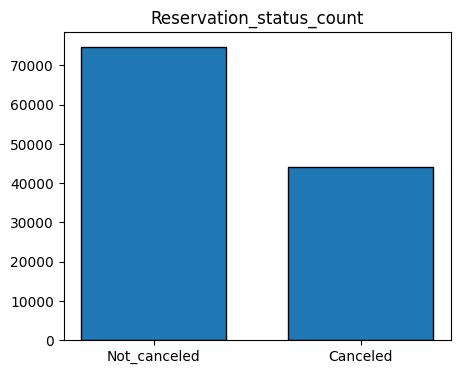

In [55]:
#Visualizing the difference between canceled and non canceled
cancel_perc=df['is_canceled'].value_counts()
plt.figure(figsize=(5,4))
plt.title('Reservation_status_count')
plt.bar(['Not_canceled','Canceled'],cancel_perc, edgecolor='black',width=0.7)
plt.show()

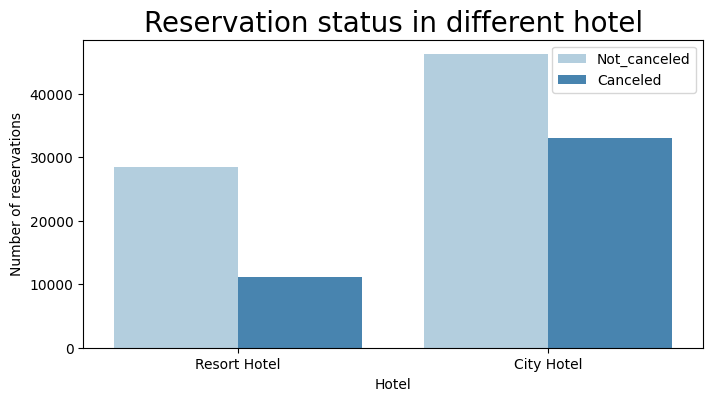

In [56]:
#plotting a countplot to check the cancellation difference between city hotel and resort hotel
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel', data=df, hue='is_canceled',palette='Blues')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status in different hotel", size=20)
plt.xlabel("Hotel")
plt.ylabel("Number of reservations")
plt.legend(['Not_canceled','Canceled'])
plt.show()



In [57]:
#Checking the data for the cancellation for resort hotel
#Result shows that cancellation rate for resort hotel is approx. 28%
resort_hotel=df[df['hotel']=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.720268
1    0.279732
Name: proportion, dtype: float64

In [58]:
#Checking the data for the cancellation for city hotel
#Result shows that cancellation rate for city hotel is approx. 42%
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582908
1    0.417092
Name: proportion, dtype: float64

In [59]:
#Checking the adr for the reservation of both the hotel
#Grouping the data based on the reservation data and getting the mean adr for the day for both hotels
resort_hotel1=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel1=city_hotel.groupby('reservation_status_date')[['adr']].mean()


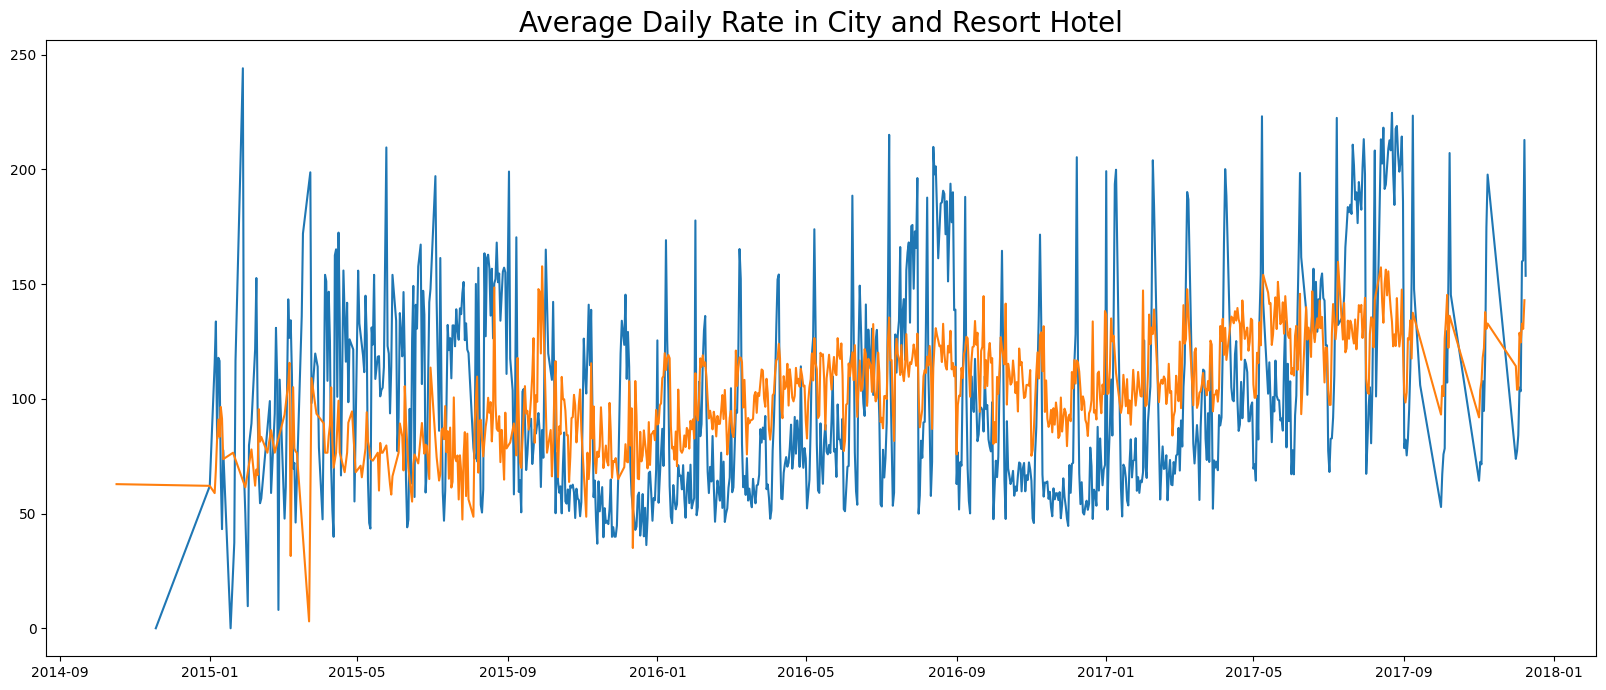

In [73]:
#Plotting the above calculation in the line graph
#Result shows that the adr for resort hotel is higher than city hotel
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel', size=20)
plt.plot(resort_hotel1.index, resort_hotel1['adr'], label='Resort Hotel')
plt.plot(city_hotel1.index, city_hotel1['adr'], label='Resort Hotel')



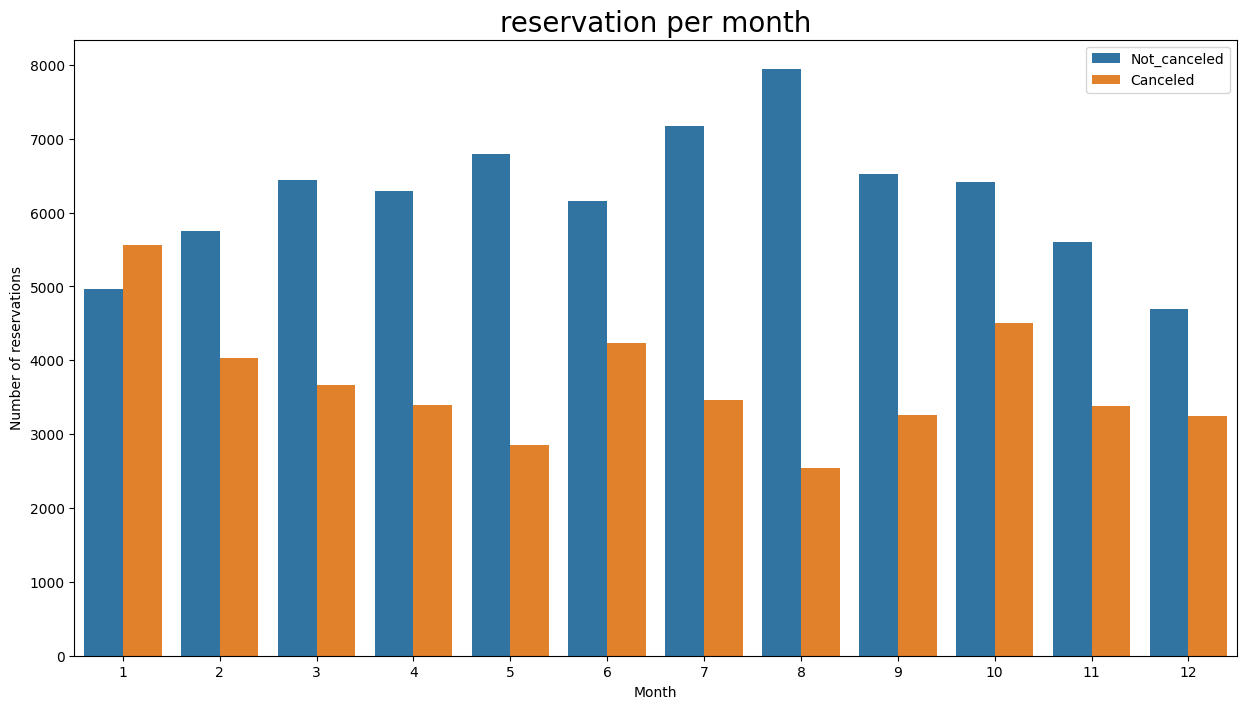

In [61]:
#Now we are checking which month has the highest reservation and which month has the highest cancellation
#Result shows that the month of August has the highest reservation and Jan has the highest cancellation.
df['month']=df['reservation_status_date'].dt.month
#df['month'] = df['reservation_status_date'].dt.strftime('%b')
plt.figure(figsize=(15,8))
plt.title("reservation per month", size=20)
sns.countplot(x= 'month', hue = df['is_canceled'], data = df)
plt.legend(['Not_canceled','Canceled'])
plt.xlabel("Month")
plt.ylabel("Number of reservations")
plt.show()


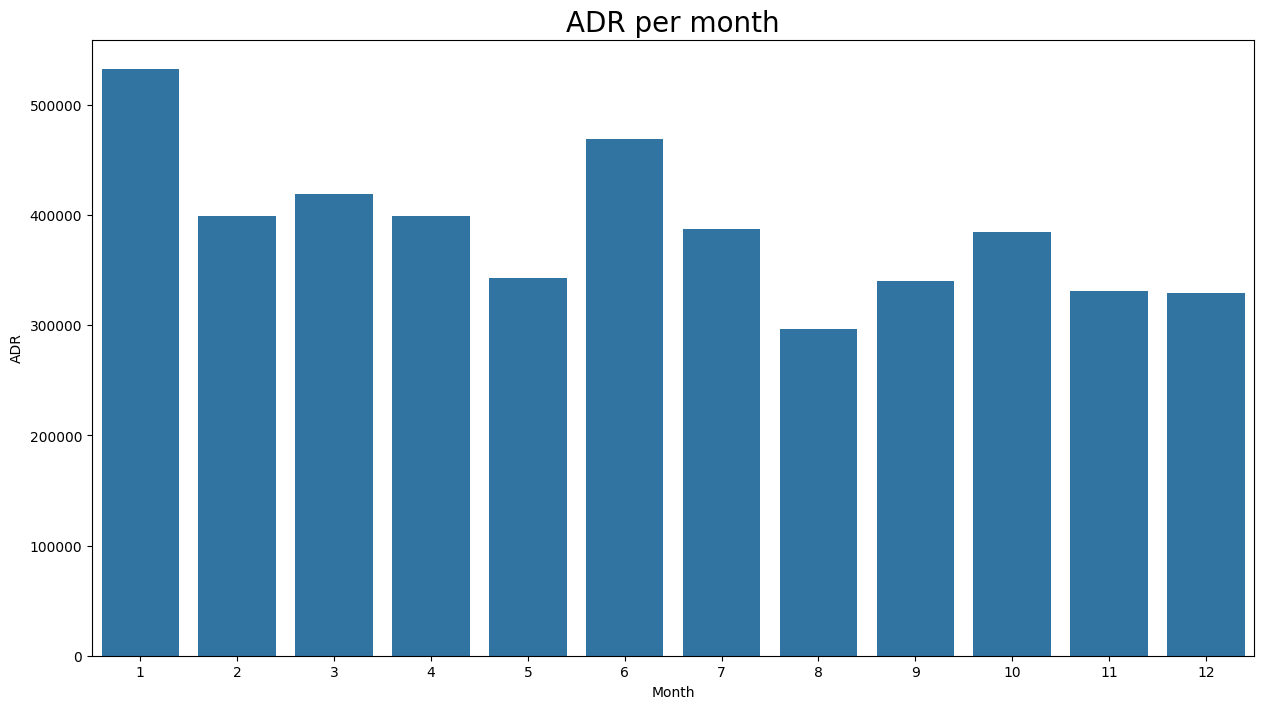

In [62]:
#Plotting the adr for each month
#Result shows that August has the lowest ADR and JAn has the highest ADR which explains its cancellation rates above
plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize=20)
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('ADR')
plt.show()

In [63]:
#Checking top 10 country for the highest cancellation
canceled_data=df[df['is_canceled']==1]
top_10_country=canceled_data['country'].value_counts()[:10]


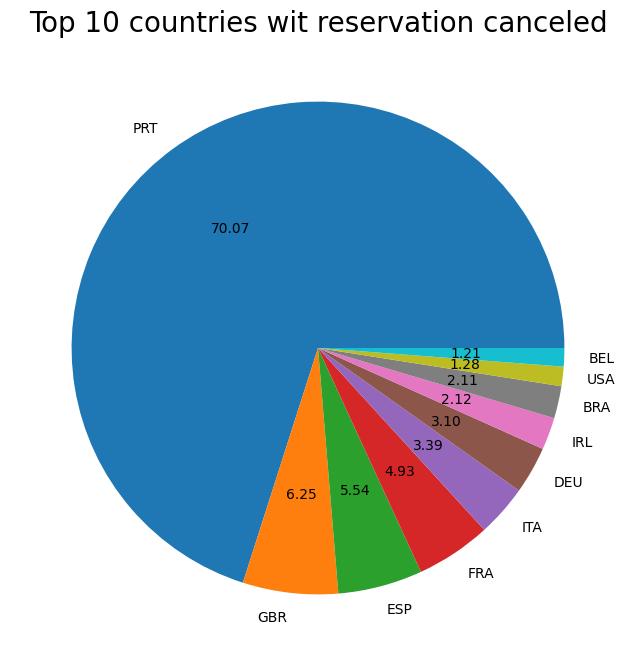

In [64]:
#Plotting the pie chart for the above calculation
#Result shows that Portugal has the highest cancellation
plt.figure(figsize=(8,8))
plt.title('Top 10 countries wit reservation canceled', size=20)
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()

In [65]:
#checking if most of the reservation is through Offline Travel agent as our hypothesis
df['market_segment'].value_counts(normalize=True)
#Result contrdicts our hypothesis and found out that Online Travel Agent is the highest market segment for the reservation

market_segment
Online TA        0.474381
Offline TA/TO    0.203189
Groups           0.166585
Direct           0.104698
Corporate        0.042979
Complementary    0.006174
Aviation         0.001993
Name: proportion, dtype: float64

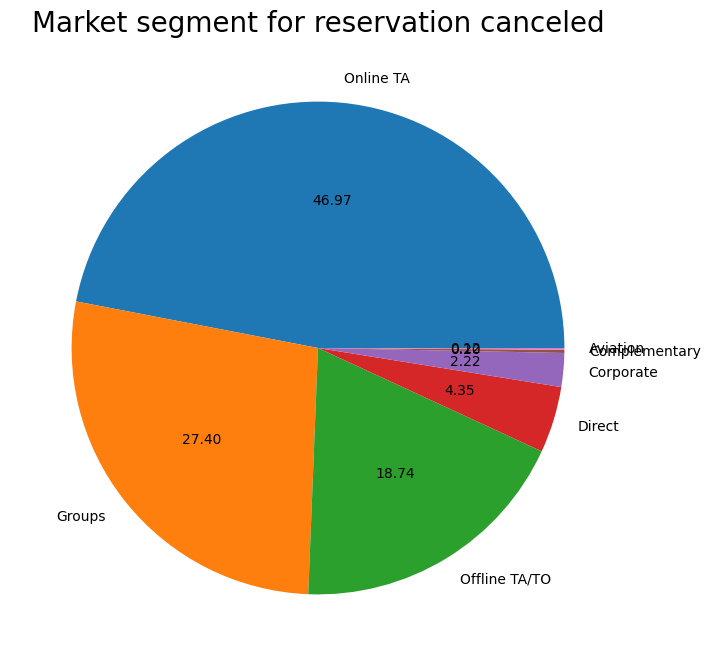

In [66]:
#Now checking which segment if highest for the cancellation
canceled_data['market_segment'].value_counts(normalize=True)
#Result shows that the cancellation is also from online travel agent and need to have a offcial meeting with online travel agent.
plt.figure(figsize=(8,8))
plt.title('Market segment for reservation canceled', size=20)
plt.pie(canceled_data['market_segment'].value_counts(), autopct='%.2f', labels=canceled_data['market_segment'].value_counts().index)
plt.show()

In [67]:
not_canceled_data=df[df['is_canceled']==0]

In [68]:
#Now checking if our hypothesis saying the cancellation is more due to higher adr
canceled_df_adr=canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date', inplace=True)

not_canceled_df_adr=not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace=True)


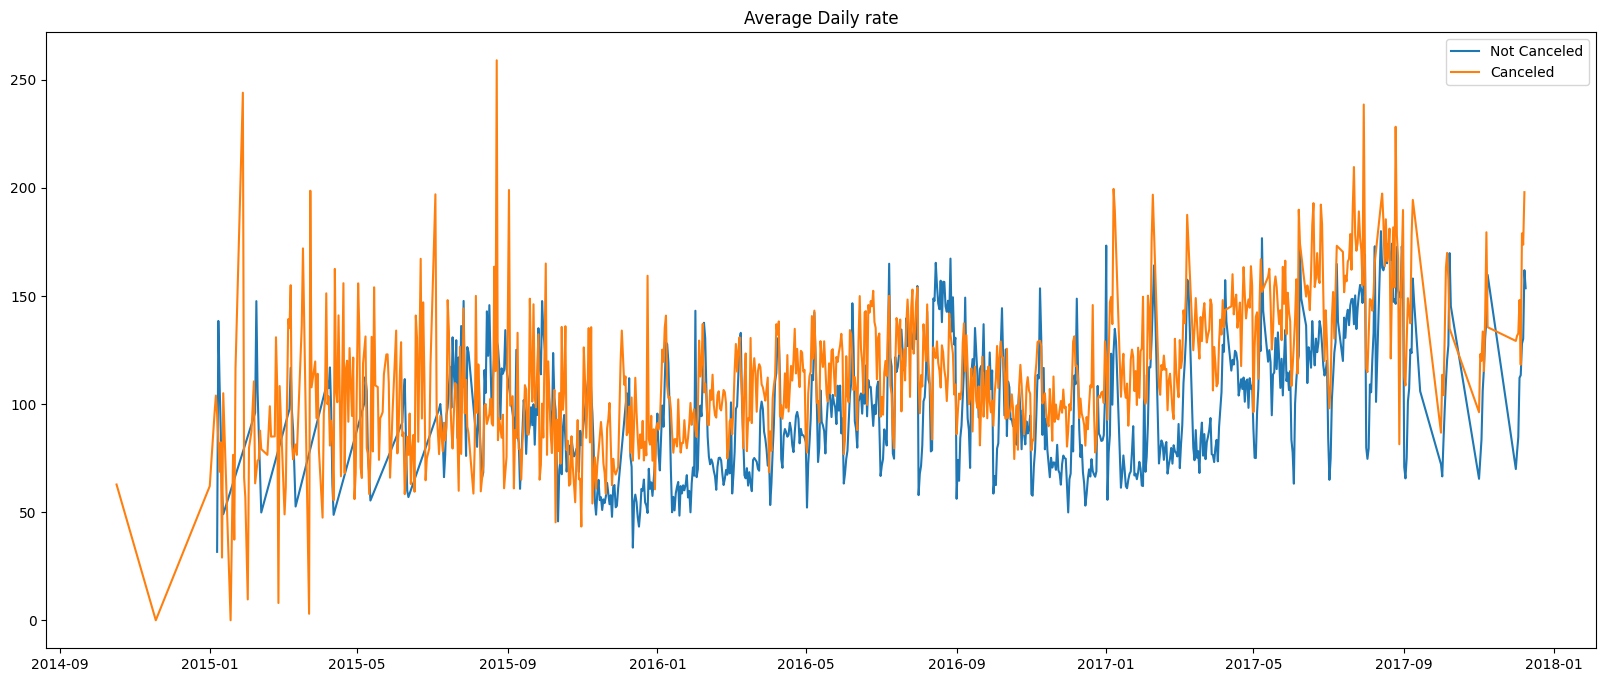

In [69]:
#Plotting the adr for cancelled data and also for non cancelled data
# The plot is not clear because of data inconsistency befor 2016 and after 09/2017
plt.figure(figsize=(20,8))
plt.title("Average Daily rate")
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='Not Canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='Canceled')
plt.legend()

In [70]:
#filtering data for consistent data between 2016 and 09/2017
canceled_df_adr=canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2016') & (canceled_df_adr['reservation_status_date']<'2017-09')]
not_canceled_df_adr=not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2016') & (not_canceled_df_adr['reservation_status_date']<'2017-09')]

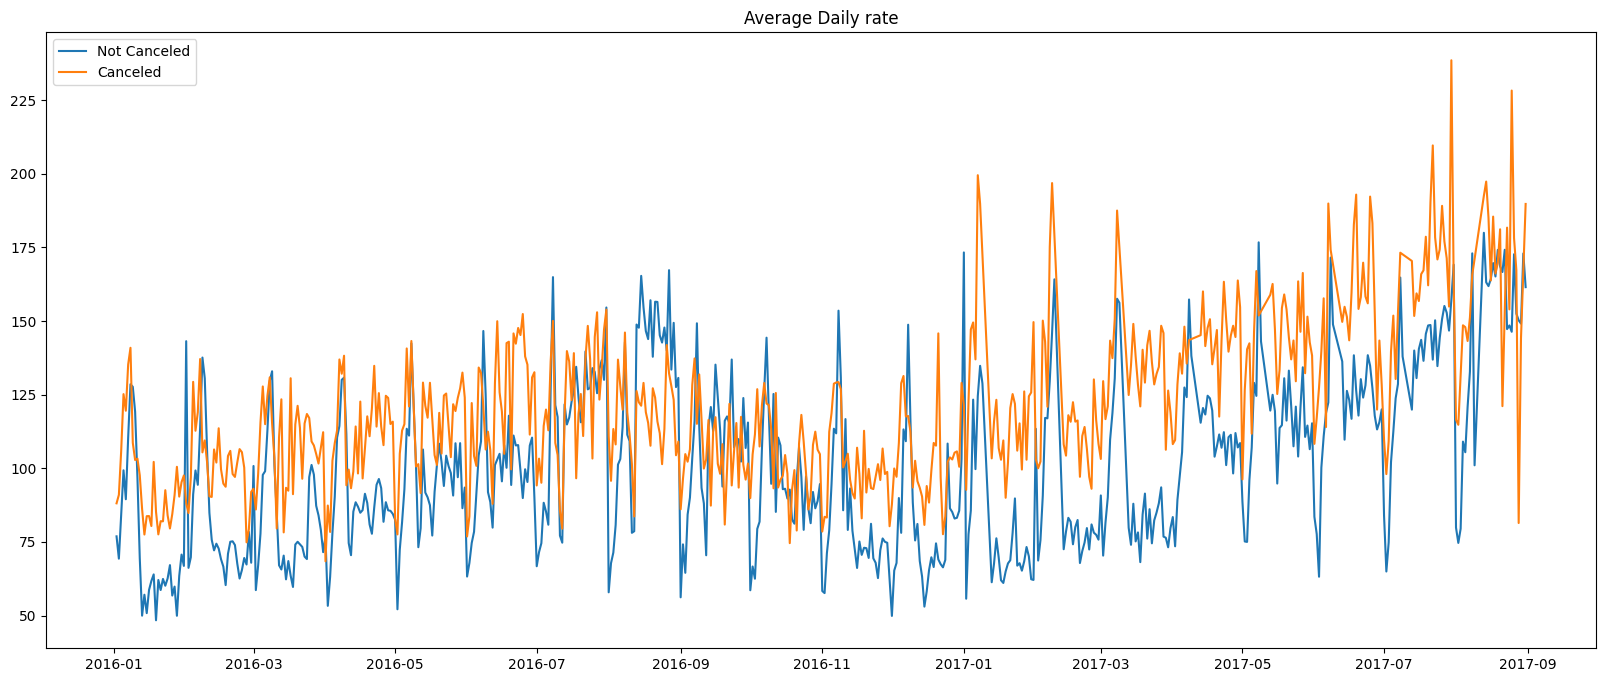

In [71]:
#Plotting data for consistent data between 2016 and 09/2017
plt.figure(figsize=(20,8))
plt.title("Average Daily rate")
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='Not Canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='Canceled')
plt.legend()
